In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt #for visualization
%matplotlib inline             
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [2]:
census_df = pd.read_csv('2010-2019 Census Data.csv')
census_df.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
0,10,0,0,0,United States,308745538,308758105,309321666,311556874,313830990,...,0.000000,2.493773,2.682083,2.636187,2.921500,3.260435,3.252788,2.871957,2.153911,1.818059
1,20,1,0,0,Northeast Region,55317240,55318443,55380134,55604223,55775216,...,-5.254530,0.887909,-0.038355,-0.469783,-0.986097,-2.061965,-2.490484,-1.837048,-2.134447,-2.859713
2,20,2,0,0,Midwest Region,66927001,66929725,66974416,67157800,67336743,...,-2.365881,-0.963930,-0.973943,-0.006924,-0.762969,-1.388437,-1.241784,-0.557370,-0.922755,-1.111173
3,20,3,0,0,South Region,114555744,114563030,114866680,116006522,117241208,...,3.261349,5.130513,5.850458,5.292073,6.161501,7.277358,7.150074,6.198168,5.225519,5.203720
4,20,4,0,0,West Region,71945553,71946907,72100436,72788329,73477823,...,0.614245,2.723344,3.062896,3.162262,4.026429,4.987285,5.261078,4.021194,3.044951,2.312083


In [3]:
#drop unneeded columns
census_df = census_df.iloc[:, 4:17]


In [4]:
# will just do california for this notebook
california_df = census_df.iloc[9]
california_df.head()

NAME                 California
CENSUS2010POP          37253956
ESTIMATESBASE2010      37254519
POPESTIMATE2010        37319502
POPESTIMATE2011        37638369
Name: 9, dtype: object

In [5]:
#dropping two more columns
california_df=california_df.drop(['NAME','ESTIMATESBASE2010','POPESTIMATE2010'])
california_df

CENSUS2010POP      37253956
POPESTIMATE2011    37638369
POPESTIMATE2012    37948800
POPESTIMATE2013    38260787
POPESTIMATE2014    38596972
POPESTIMATE2015    38918045
POPESTIMATE2016    39167117
POPESTIMATE2017    39358497
POPESTIMATE2018    39461588
POPESTIMATE2019    39512223
Name: 9, dtype: object

In [6]:
#rename rows
california_df=california_df.rename({"CENSUS2010POP": 2010, "POPESTIMATE2011": 2011, 'POPESTIMATE2012': 2012, 'POPESTIMATE2013':2013, 
                      'POPESTIMATE2014':2014,'POPESTIMATE2015':2015, 'POPESTIMATE2016':2016, 
                      'POPESTIMATE2017':2017, 'POPESTIMATE2018':2018, 'POPESTIMATE2019':2019}, axis='index')
california_df

2010    37253956
2011    37638369
2012    37948800
2013    38260787
2014    38596972
2015    38918045
2016    39167117
2017    39358497
2018    39461588
2019    39512223
Name: 9, dtype: object

In [7]:
california_df = california_df.astype(int)

In [8]:
#train test split
#lets do 6 years of training 4 of test
training_data = california_df[0:6]

test_data = california_df[6:]
test_data


2016    39167117
2017    39358497
2018    39461588
2019    39512223
Name: 9, dtype: int32

In [9]:
#EDF

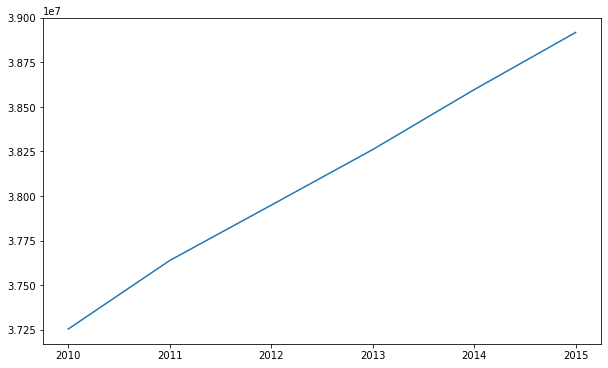

In [10]:
plt.plot(training_data)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

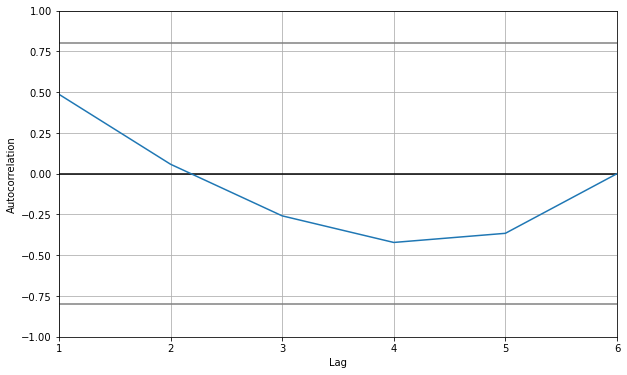

In [11]:
#auto correlation
autocorrelation_plot(training_data)

C:\Users\djkri\anaconda3\envs\mlenv\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


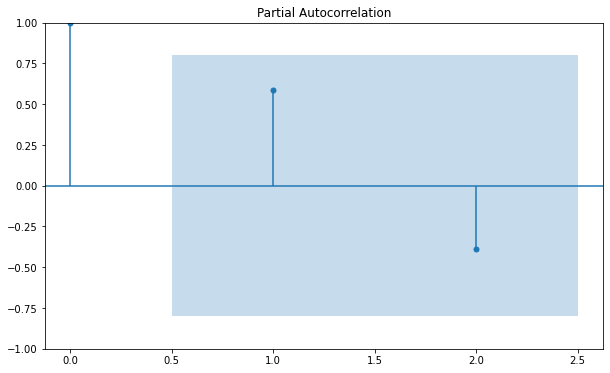

In [12]:
#partial auto correlation
plot_pacf(training_data, lags= 2)
plt.show()

In [13]:
#orders for arima model 
# 1 or 2 for p
# 2 for Q
# 0 for d

In [14]:
training_data.values

array([37253956, 37638369, 37948800, 38260787, 38596972, 38918045])

In [1]:
#arima model
model = ARIMA(training_data, order=(1,1,1))
results_AR = model.fit()
print(results_AR.summary())
residuals = results_AR.resid
residuals.plot()
plt.show()


NameError: name 'ARIMA' is not defined

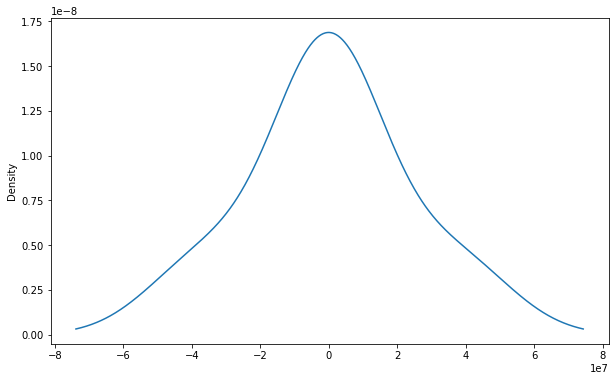

count    6.000000e+00
mean     7.697929e+04
std      2.341915e+07
min     -3.680299e+07
25%     -1.132816e+04
50%      9.382138e+02
75%      1.857262e+04
max      3.725396e+07
dtype: float64


In [38]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [39]:
#making predictions
y_pred = pd.Series(results_AR.forecast(4))
y_pred

C:\Users\djkri\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


6    3.923909e+07
7    3.956013e+07
8    3.988117e+07
9    4.020221e+07
Name: predicted_mean, dtype: float64

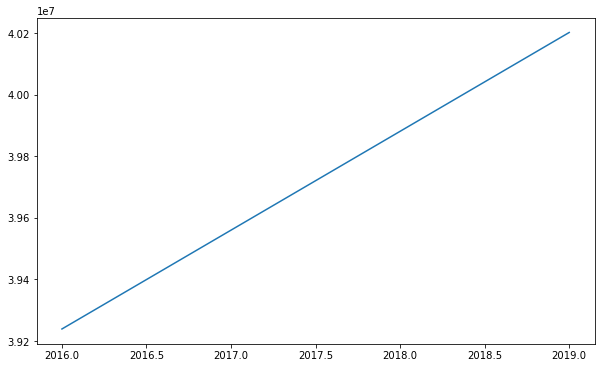

In [40]:
#rename forecast index to correct years
y_pred= y_pred.rename({6:2016, 7:2017, 8:2018, 9:2019})
y_pred.plot()
plt.show()


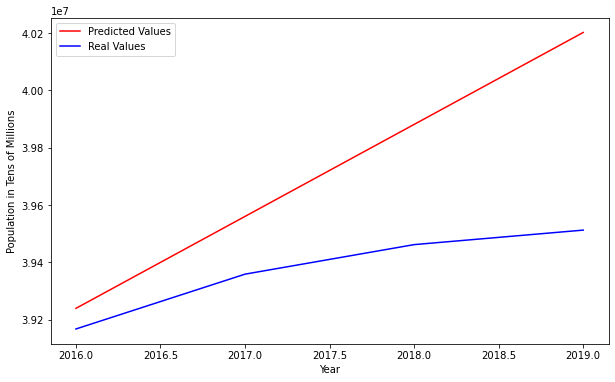

In [41]:
#now plot the model predictions and the test data
y_real = test_data
y_pred.plot(color='red', label = "Predicted Values")
y_real.plot(color='blue', label = "Real Values")
plt.xlabel("Year")
plt.ylabel('Population in Tens of Millions')
plt.legend()
plt.show()

In [252]:
# prediction analysis
#mean absolute percent error
mape = np.mean(np.abs(y_pred-y_real)/np.abs(y_real))

#mean absolute scaled error
n = training_data.shape[0]
d = np.abs(np.diff(training_data)).sum()/(n-1)
errors = np.abs(y_real - y_pred)
mase = errors.mean()/d
print(f"MAPE: {mape}",
     f"\nMASE: {mase}")

MAPE: 0.0034060783471728277 
MASE: 0.403814862162582


In [253]:
#mape and mase are good for time series as they can deal with the scale of a time series forecast better than other 
#methods of accuracy/error calculation

#mase compares the predictions of the model to a naive model, meaning a model that uses the last observed value as the value
# for all of the predictions
# a mase of 1 means that the model is just as accurate as picking the last observed value over and over as the prediction
# a mase of 0.5 means that the model is twice as accurate as the naive model


#the mape is a measure of error that is scale independent so it is useful for evaluating error of time series forecasting
#the mape is represented as a percentage
# so our mape of 0.3% should be considered a relatively good error.

In [254]:
#room for improvement for sure i think
# the plot looks kind of. you can faintly see the two elbows that are present in 
#the real values appear in the predicted graph. And at the correct years. 
# it mostly just seems like the magnitude of the values are off but the general trend of the values is there